In [1]:
import logging

import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

from utils import ILSVRC2014Sample, to_np, to_tensor, CUDA, VGG

logging.getLogger("PIL").setLevel(logging.INFO)

In [2]:
vgg = VGG("vgg19")
if CUDA:
    vgg.cuda()

In [3]:
ilsvrc = ILSVRC2014Sample(40)

In [4]:
def explain(img_idx):
    img = ilsvrc.data[img_idx]
    true_label = ilsvrc.label_to_desc[ilsvrc.labels[img_idx]]
    prediction = ilsvrc.id_to_desc[vgg.predict(to_tensor(img[None])).item()]
    print(f"Prediction: {prediction} (True: {true_label})")

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(
        img,
        lambda x: to_np(vgg.forward(to_tensor(x))), # classification function
        top_labels=5, 
        hide_color=0,
        num_samples=1000) # number of images that will be sent to classification function

    fig, axs = plt.subplots(1, len(explanation.top_labels), figsize=(20, 20))

    for ax, pred_id in zip(axs, explanation.top_labels):
        temp, mask = explanation.get_image_and_mask(pred_id, positive_only=False, num_features=10, hide_rest=False)
        img_boundry1 = mark_boundaries(temp, mask)
        ax.set_title(ilsvrc.id_to_desc[pred_id])
        ax.imshow(img_boundry1)

Prediction: sea snake (True: sea snake)


100%|██████████| 1000/1000 [00:12<00:00, 78.18it/s]


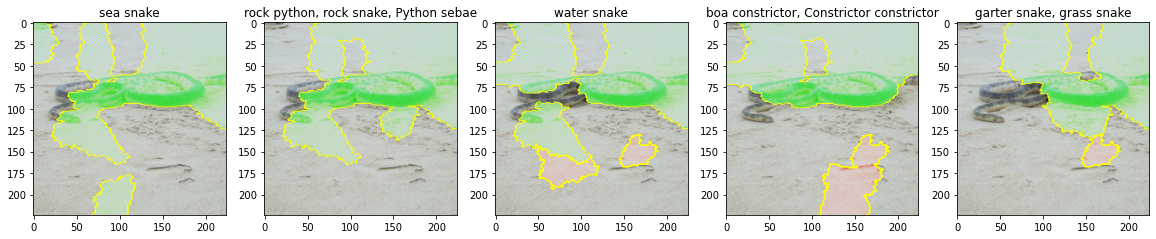

In [5]:
explain(0)

Prediction: ski (True: alp)


100%|██████████| 1000/1000 [00:12<00:00, 77.81it/s]


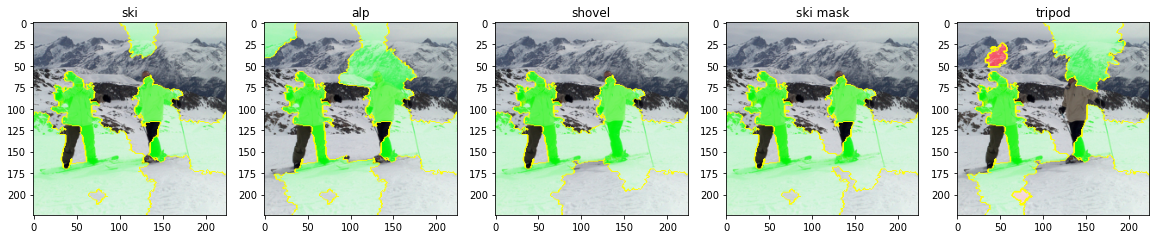

In [6]:
explain(1)

Prediction: Shetland sheepdog, Shetland sheep dog, Shetland (True: Shetland sheepdog, Shetland sheep dog, Shetland)


100%|██████████| 1000/1000 [00:13<00:00, 75.75it/s]


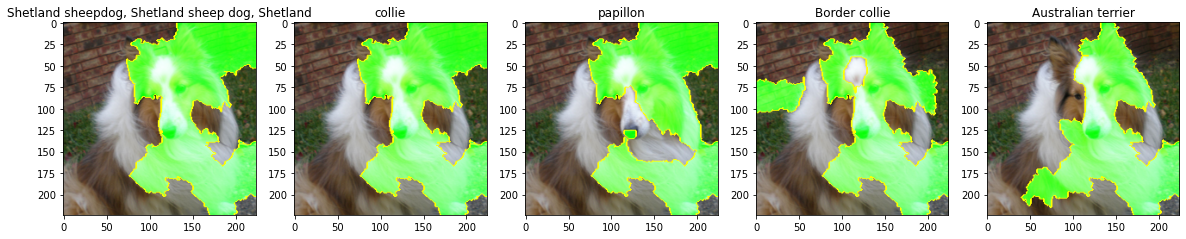

In [7]:
explain(2)

Prediction: soup bowl (True: soup bowl)


100%|██████████| 1000/1000 [00:12<00:00, 76.99it/s]


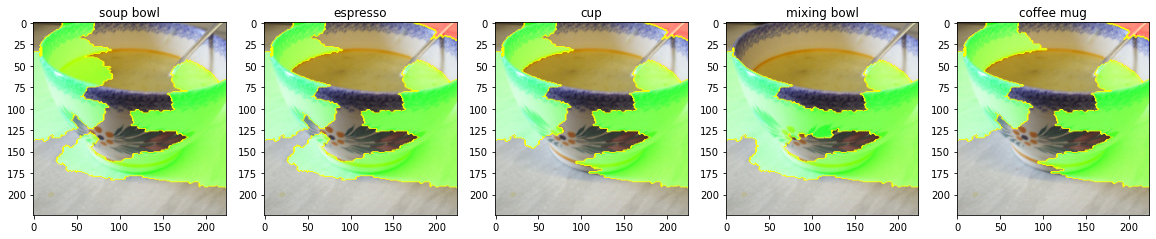

In [8]:
explain(3)

Prediction: bassinet (True: cradle)


100%|██████████| 1000/1000 [00:13<00:00, 76.80it/s]


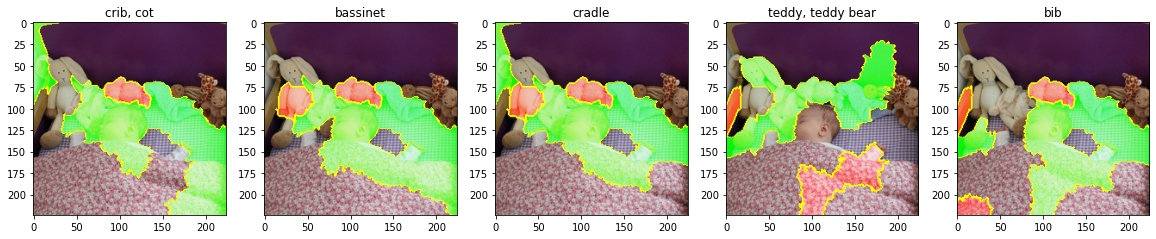

In [9]:
explain(4)